In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import gymnasium as gym
import os
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from model import DQN
from replay_memory import ReplayBuffer
from wrappers import make_atari_env
from utils import train, test, plot_stats
from Param import *

In [4]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [6]:
env_id = "ALE/Pong-v5"
env = make_atari_env(env_id)

In [7]:
model = DQN(env.observation_space.shape, env.action_space.n).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00025)
replay_buffer = ReplayBuffer(MEMORY_SIZE)

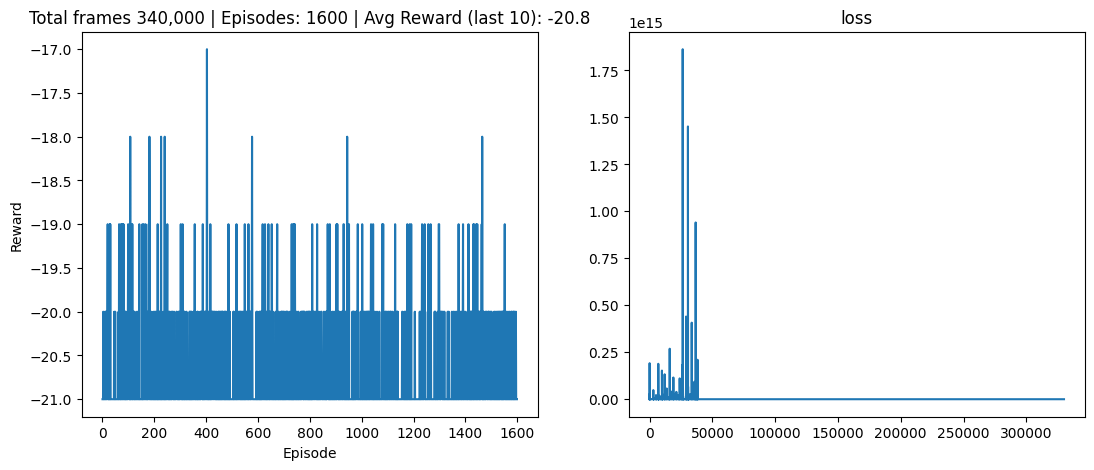

KeyboardInterrupt: 

In [8]:
train(env, model, optimizer, replay_buffer, device)